This project was design to help me dive in and get my hands dirty with Python for Data Science projects.
It's a data scientist approach to a common problem affecting most creditors in the financial sector.

## Background:
Over the past year or so Credit One has seen an increase in the number of customers who have defaulted on loans they have secured from various partners, and Credit One, as their credit scoring service, could risk losing business if the problem is not solved right immediately. They have enlisted the help of our Data Science team to design and implement a creative, empirically sound solution. Due to the magnitude of the problem and its urgency, we have been given full authority to solve this problem with whatever tools and methods needed. As such, this problem was treated different from a typical data analytic problem. We've elected to use Python and a few different libraries to do the heavy lifting for us. We'll be using a few main libraries for the bulk of our work, but by no means intend to be limited to only using those. Other libraries and tools will be explored to obtain the best solution within shortest possible time.
 
As highlighted in our data science process framework, first thing is to define the problem and understand the differences between this data science project and our regular data analytics projects. Then, we'll establish a dedicated local programming environment  where GitHub will be utilize to aid with work performance without needing to be in one space or another to have access to the needed tools, before finally starting the analysis and soling this problem.

# Problem:
1. Increase in customer default rates - This is bad for Credit One since Credit One approves the customers for loans
   in the first place.
2. Revenue and customer loss for clients and, eventually, loss of clients for Credit One

## Investigative Questions:
How can we ensure that customers can/will pay their loans? Can we do this?
 
## Considering Credit One Lessons learned from a similar problem addressed in the previous year:
1. We cannot control customer spending habits
2. We cannot always go from what we find in our analysis to the underlying "why"
3. We must on the problem(s) we can solve: What attributes in the data can we deem to be statistically significant 
   to the problem at hand?
4. What concrete information can we derive from the data we have?
5. What proven methods can we use to uncover more information and why?

In [4]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [3]:
pwd

'C:\\Users\\ietuk'

In [1]:
import pandas as pd

In [2]:
LoanFile = pd.read_csv(r"C:\Users\ietuk\Documents\gitHub_Python\default _credit_card_clients.csv", header=1)

In [3]:
LoanFile.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
LoanFile.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
LoanFile.describe()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
#rename dependent variable
LoanFile.rename(columns={'default payment next month':'default_payment'}, 
                 inplace=True)
 
print(LoanFile.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment'],
      dtype='object')


In [7]:
# check for data type
LoanFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                 30000 non-null int64
LIMIT_BAL          30000 non-null int64
SEX                30000 non-null int64
EDUCATION          30000 non-null int64
MARRIAGE           30000 non-null int64
AGE                30000 non-null int64
PAY_0              30000 non-null int64
PAY_2              30000 non-null int64
PAY_3              30000 non-null int64
PAY_4              30000 non-null int64
PAY_5              30000 non-null int64
PAY_6              30000 non-null int64
BILL_AMT1          30000 non-null int64
BILL_AMT2          30000 non-null int64
BILL_AMT3          30000 non-null int64
BILL_AMT4          30000 non-null int64
BILL_AMT5          30000 non-null int64
BILL_AMT6          30000 non-null int64
PAY_AMT1           30000 non-null int64
PAY_AMT2           30000 non-null int64
PAY_AMT3           30000 non-null int64
PAY_AMT4           30000 non-null int64
PAY_AMT5   

In [8]:
#Import Packages
import copy
import matplotlib.pyplot as plt
import numpy as np

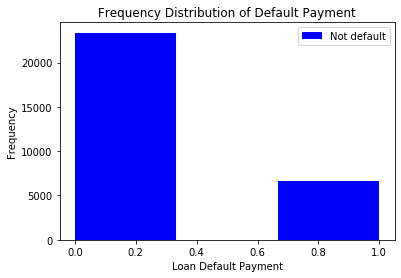

In [9]:
# plot histogram of the dependent variable default_payment_next_month
plt.hist(LoanFile.default_payment, color='b', bins=3,
        label=['Not default', 'Default'])
plt.xlabel('Loan Default Payment')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Default Payment')
plt.legend()

In [2]:
# Show plots in the 'seaborn-notebook' style and ggplot
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.style.context('ggplot');

A quick glance of the data shows 30000 rows or instances and 25 columns or features. The data types are all integers. default_payment is the dependent variable.

The comparative analysis from the histogram plot above shows higher loan default payment rate from the data set. This confirms our client's concern. 


In [10]:
# check for missing data in the data set
LoanFile.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_payment    0
dtype: int64

In [17]:
# remove some attributes
LoanFile1 = LoanFile.drop(['ID', 'SEX', 'MARRIAGE'], axis=1)
print(LoanFile1)

       LIMIT_BAL  EDUCATION  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0          20000          2   24      2      2     -1     -1     -2     -2   
1         120000          2   26     -1      2      0      0      0      2   
2          90000          2   34      0      0      0      0      0      0   
3          50000          2   37      0      0      0      0      0      0   
4          50000          2   57     -1      0     -1      0      0      0   
5          50000          1   37      0      0      0      0      0      0   
6         500000          1   29      0      0      0      0      0      0   
7         100000          2   23      0     -1     -1      0      0     -1   
8         140000          3   28      0      0      2      0      0      0   
9          20000          3   35     -2     -2     -2     -2     -1     -1   
10        200000          3   34      0      0      2      0      0     -1   
11        260000          1   51     -1     -1     -1     -1    

Data Reduction
Data Discretization

In [110]:
# create a new data set in .csv file to be used for exploratory analysis
new_LoanFile = LoanFile1.to_csv(r"C:\Users\ietuk\Documents\gitHub_Python\new_LoanFile.csv", index = None, header=True)


## Exploratory Analysis

After thoroughly cleaning, the data is ready to begin exploring it to gain further insight about the problem at hand and how we can use data science to solve it or at least gain a further understanding of it.

According to (Mayo, 2017), "Exploratory data analysis (EDA) is an integral aspect of any greater data analysis, data science, or machine learning project. Understanding data before working with it isn't just a pretty good idea, it is a priority if you plan on accomplishing anything of consequence."

In order to gain insight knowledge about the loan default data, we'd to breakdown the data exploration process into following:

1. Insight Visualization and Statistics about aach Variable/Attribute. 
2. Scatter plots comparing the relationships between any two variables.
3. If needed, visualizing the relationship between multiple variables.
4. Checking for collinearity or performing dimensionality reduction.

### Data Visualization

Let's us use Histograms to visualize and understand how the data is univariately distributed in any given variable of the loan data set. 

Histograms are very useful for understanding how the data is distributed in any given single (univariate) variable. Lets have a look at how we can build histograms in Python.

1. The first item of business is to import the matplotlib library; it contains most of the major visualizations we'll be using. Note: Another popular Python library is called Seaborn- you'll often see either it or matplotlib used in Data Science and the two are similar.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
# import and use newly created data set new_LoanFile
new_LoanFileDF = pd.read_csv(r"C:\Users\ietuk\Documents\gitHub_Python\new_LoanFile.csv")

In [113]:
new_LoanFileDF.head()


,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,34,0,0,0,0,0,0,29239,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,37,0,0,0,0,0,0,46990,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,57,-1,0,-1,0,0,0,8617,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [114]:
# Next, lets verify column names in our dataframe before plotting
header = new_LoanFileDF.dtypes.index
print(header)

Index(['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment'],
      dtype='object')


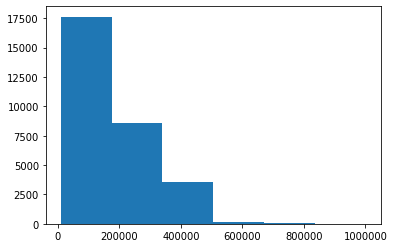

In [115]:
# Build histogram using .hist method of matplotlib to plots the 'LIMIT_BAL' variable
plt.hist(new_LoanFileDF['LIMIT_BAL'], bins=6)
plt.show()

We'll continue with univariate analysis by plotting multiple features

TIP:
If needed, you can create subplots to plot more than one of any type of plot for comparison against another. Check the resources for more information and for some examples of subplots with matplotlib.

 Line Plots

Line plots are often used in EDA to illustrate the range and mode of any given numerical variable. This can be very important for things like preventing bias and model overfit and even identifying collinearity.

Creating line plots is very easy in matplotlib and can be done for a single variable or for multiple variables at once (multivariate). Lets start by creating a line plot for the same variable we studied previously.

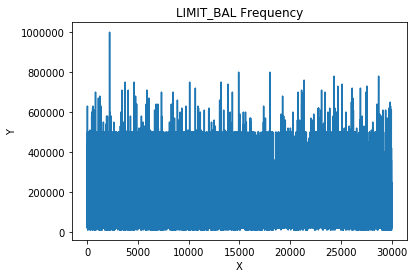

In [116]:
# Creating line plot of LIMIT_BAL
plt.plot(new_LoanFileDF['LIMIT_BAL'])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("LIMIT_BAL Frequency")
plt.show()

Scatter plots are useful for comparing two features (bivariate and multiple features (multivariate) to each other.
We will use this to understanding any possible relationships between the variables in the data set, but not confusing with causation.

In [117]:
# In order to create a comparison of 'PAY_0' to 'PAY_2', we must first set the two features equal to variables as follows:
x = new_LoanFileDF['PAY_0']
y = new_LoanFileDF['PAY_2']

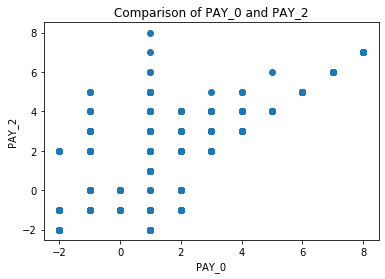

In [118]:
plt.scatter(x,y)
plt.xlabel('PAY_0')
plt.ylabel('PAY_2')
plt.title('Comparison of PAY_0 and PAY_2')
plt.show()

## Visualization with Box Plots

The Box or Whisker Plot above is useful for quickly visualizing where the bulk of the data is in variables. Looking features may help to uncover outliers or variances in the observations. Unerstanding what features might contain outliers is very important in Data Science and very important for Machine Learning. Lets look at the different components that make up a good box plot.
The lines that extend from either side of the 'box' in the middle of the plot can demonstrate the existence of outlying data points in the feature if point go beyond the ends of the lines (whiskers), but this doesn't necessarily mean there is an issue. 


In [119]:
header = new_LoanFileDF.dtypes.index
print(header)

Index(['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment'],
      dtype='object')


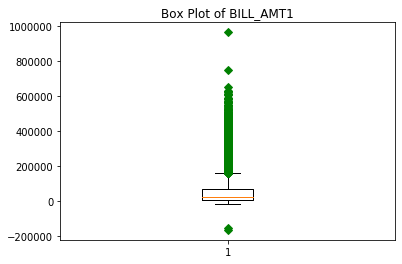

In [120]:
#Let's visualize box plot of BILL_AMT1:
A = new_LoanFileDF['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.title('Box Plot of BILL_AMT1')
new_LoanFileDF
plt.show()

## Correlation

Will use correlation to address collinearity and check for relationships between features for selection or engineering.

In [121]:
corrMat = new_LoanFileDF.corr()
print(corrMat)

                 LIMIT_BAL  EDUCATION       AGE     PAY_0     PAY_2     PAY_3  \
LIMIT_BAL         1.000000  -0.219161  0.144713 -0.271214 -0.296382 -0.286123   
EDUCATION        -0.219161   1.000000  0.175061  0.105364  0.121566  0.114025   
AGE               0.144713   0.175061  1.000000 -0.039447 -0.050148 -0.053048   
PAY_0            -0.271214   0.105364 -0.039447  1.000000  0.672164  0.574245   
PAY_2            -0.296382   0.121566 -0.050148  0.672164  1.000000  0.766552   
PAY_3            -0.286123   0.114025 -0.053048  0.574245  0.766552  1.000000   
PAY_4            -0.267460   0.108793 -0.049722  0.538841  0.662067  0.777359   
PAY_5            -0.249411   0.097520 -0.053826  0.509426  0.622780  0.686775   
PAY_6            -0.235195   0.082316 -0.048773  0.474553  0.575501  0.632684   
BILL_AMT1         0.285430   0.023581  0.056239  0.187068  0.234887  0.208473   
BILL_AMT2         0.278314   0.018749  0.054283  0.189859  0.235257  0.237295   
BILL_AMT3         0.283236  

## Covariance

From our understanding of the strength of relationships between any two variables using correlation analysis above, we can ascertain the impact one feature has on another. Covariance is often used to gauge the linear degree of change between two variables. We'll then use covariance to measure how changes in one variable are associated with changes in another variable. This will be very important when studying the impact various features might have on default rates. 

In [122]:
covMat = new_LoanFileDF.cov()
print(covMat)

                    LIMIT_BAL     EDUCATION            AGE         PAY_0  \
LIMIT_BAL        1.683446e+10 -22474.028945  173076.722569 -39545.930009   
EDUCATION       -2.247403e+04      0.624651       1.275380      0.093584   
AGE              1.730767e+05      1.275380      84.969755     -0.408639   
PAY_0           -3.954593e+04      0.093584      -0.408639      1.262930   
PAY_2           -4.603765e+04      0.115025      -0.553408      0.904330   
PAY_3           -4.443225e+04      0.107861      -0.585263      0.772384   
PAY_4           -4.057181e+04      0.100528      -0.535851      0.707972   
PAY_5           -3.667056e+04      0.087340      -0.562245      0.648743   
PAY_6           -3.509308e+04      0.074816      -0.517022      0.613292   
BILL_AMT1        2.727020e+09   1372.377644   38172.933546  15480.304170   
BILL_AMT2        2.570130e+09   1054.657595   35613.657962  15185.916919   
BILL_AMT3        2.548533e+09    712.664124   34334.251320  14011.556537   
BILL_AMT4   

In [147]:
import matplotlib as mpl
import seaborn as sns 
%matplotlib inline

In [148]:
from pylab import *


In [150]:
# Set default matplot figure size
%pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'fft', 'linalg', 'info', 'power']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Deep Exploration and Insights

In [151]:
# Number of customers in each education level:
# 1 = graduate school
# 2 = university 
# 3 = high school 
# 0, 4, 5, 6 = others

new_LoanFileDF.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

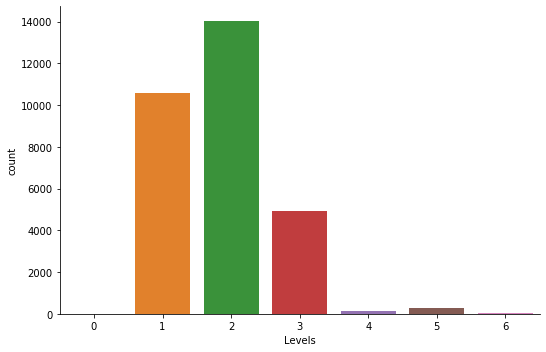

In [125]:
# let's use seaborn to plot the count of customers in each educational level
fEDL = sns.catplot('EDUCATION', data=new_LoanFileDF, kind='count', aspect=1.5)
fEDL.set_xlabels('Levels')

The above plot above showed majority of the loan customers had minimum of high school diploma. We may draw assumption that they have jobs or were employed at the time of loan assumption. Intuitively, this is in line with a typical bank loan customers. We can also infer from the plot above that majority of the customers have at least a university degree. 
Was this creditor specifically targeting customers with at least a college degree for loan approval?

In [126]:
print(new_LoanFileDF['AGE'].max())
print(new_LoanFileDF['AGE'].min())

79
21


In [152]:
bins = [21, 30, 40, 50, 60, 70, 120]
labels = ['21-29', '30-39', '40-49', '50-59', '60-69', '70+']
new_LoanFileDF['age_range'] = pd.cut(new_LoanFileDF['AGE'], bins, labels = labels, include_lowest= True)


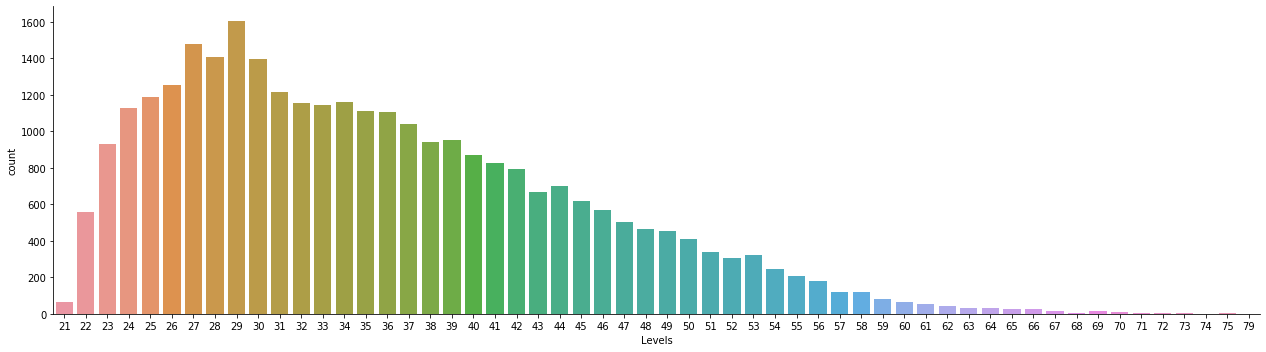

In [153]:
# let's use seaborn to look at distribution of each age
fEDL = sns.catplot('AGE', data=new_LoanFileDF, kind='count', aspect=3.5)
fEDL.set_xlabels('Levels')

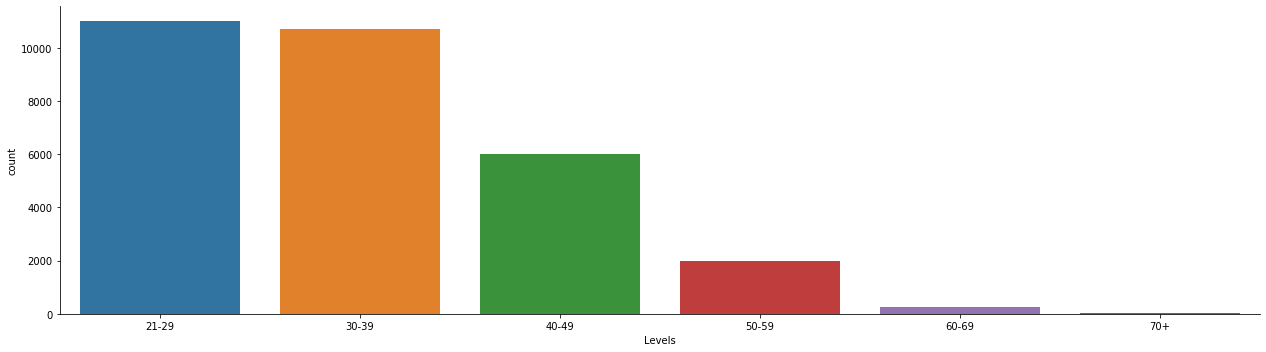

In [154]:
# let's use seaborn to look at distribution of age in bins
fEDL = sns.catplot('age_range', data=new_LoanFileDF, kind='count', aspect=3.5)
fEDL.set_xlabels('Levels')

The above plots show that majority of loan customers fall within ages 21 to 40. Another indication of younger customer base.

In [155]:
# Number of loan defaulted payment in each age range and educational level
new_LoanFileDF.groupby(['age_range', 'EDUCATION', 'default_payment'])['default_payment'].count()

age_range  EDUCATION  default_payment
21-29      0          0                     3
           1          0                  3505
                      1                   799
           2          0                  4098
                      1                  1370
           3          0                   788
                      1                   293
           4          0                    54
                      1                     4
           5          0                    88
                      1                     4
           6          0                     6
                      1                     1
30-39      0          0                     7
           1          0                  3352
                      1                   783
           2          0                  3947
                      1                  1087
           3          0                  1069
                      1                   311
           4          0                   

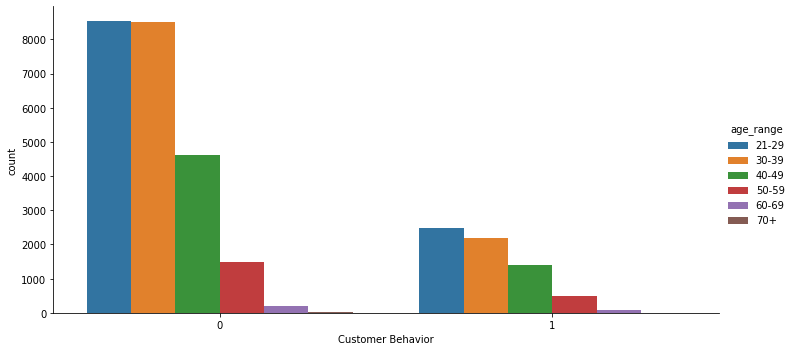

In [156]:
# Again use seaborn to group by customer's behavior (default_payment) and age_range
# 0 = No Default_Payment; 1 = Default_Payment

gd = sns.catplot('default_payment', data=new_LoanFileDF, hue='age_range', kind='count', aspect=2)
gd.set_xlabels('Customer Behavior')


Another insight derived from the data is that the younger customers have higher default_payment rate than older customers. There seems to exist a downward trend, the older the age group the better payment behavior. However, more insight analysis is required to understand if this is due to the population of each age group.

In [157]:
# Number of customers with defaulted payment in each class grouped by age_range. 
# Also total was found for each class grouped by educational level.
new_LoanFileDF.pivot_table('default_payment', 'age_range', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
age_range,,,,,,,,
21-29,0.0,799.0,1370.0,293.0,4.0,4.0,1.0,2471
30-39,0.0,783.0,1087.0,311.0,1.0,6.0,1.0,2189
40-49,0.0,326.0,653.0,408.0,1.0,7.0,4.0,504
50-59,0.0,112.0,192.0,196.0,1.0,1.0,2.0,1399
60-69,NaN,15.0,27.0,26.0,NaN,0.0,0.0,68
70+,NaN,1.0,1.0,3.0,NaN,NaN,NaN,5
All,0.0,2036.0,3330.0,1237.0,7.0,18.0,8.0,6636


In [158]:
print('Average and median age of customers are %0.f and %0.f years old, respectively'%(new_LoanFileDF.AGE.mean(), 
                                                                          new_LoanFileDF.AGE.median()))

Average and median age of customers are 35 and 34 years old, respectively


In [160]:
# Drop missing values for the records in which age passenger is missing
age = new_LoanFileDF['AGE'].dropna()

Text(0.5, 1.0, "Distribution of Customers' Ages")

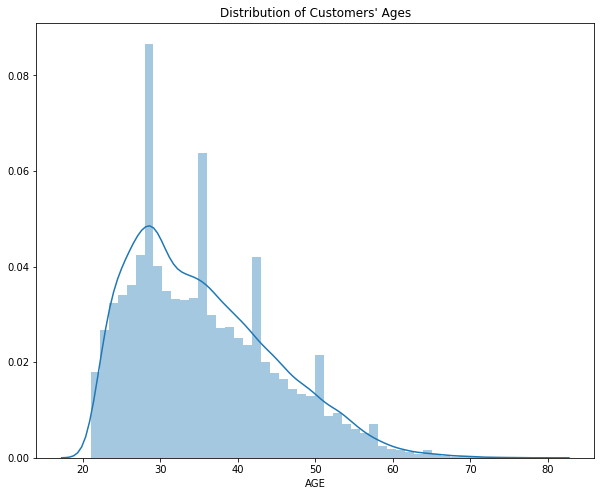

In [161]:
# Distribution of customers age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers' Ages")